# Sistema Baseado em Regras Fuzzy

Este notebook implementa dois sistemas baseados em regras fuzzy:
1. **Análise de Risco de Sucesso de Projetos de Software**
2. **Controle de Temperatura da Água de um Chuveiro**

### Objetivos:
- Demonstrar o processo de modelagem fuzzy
- Implementar funções de pertinência para fuzzificação
- Criar bases de regras fuzzy
- Aplicar métodos de defuzzificação
- Realizar inferência sobre o conhecimento

## 1. Importar Bibliotecas Necessárias

Vamos importar todas as bibliotecas necessárias para implementar os sistemas fuzzy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzz
from skfuzzy import control as ctrl

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)

print("Bibliotecas importadas com sucesso!")
print(f"Versão do scikit-fuzzy: {fuzz.__version__}")
print(f"Versão do numpy: {np.__version__}")

Bibliotecas importadas com sucesso!
Versão do scikit-fuzzy: 0.5.0
Versão do numpy: 2.3.3


## 2. Sistema 1: Análise de Risco de Projetos de Software

### Descrição do Problema:
Este sistema avalia o risco de sucesso de projetos de software baseado em três variáveis principais:
- **Complexidade do Projeto**: Medida em escala de 0 a 10
- **Recursos Disponíveis**: Disponibilidade de recursos (humanos, financeiros, técnicos) em escala de 0 a 10
- **Prazo**: Adequação do prazo do projeto em escala de 0 a 10

**Objetivo**: Determinar o **Risco de Sucesso** do projeto em escala de 0 a 100.

### 2.1 Definir Variáveis de Entrada e Saída para Análise de Risco

In [ ]:
# Definimos as variáveis para análise de risco de projetos
# Variáveis de entrada (antecedentes)
complexidade = ctrl.Antecedent(np.arange(0, 11, 1), 'complexidade')
recursos = ctrl.Antecedent(np.arange(0, 11, 1), 'recursos')
prazo = ctrl.Antecedent(np.arange(0, 11, 1), 'prazo')

# Variável de saída (consequente)
risco_sucesso = ctrl.Consequent(np.arange(0, 101, 1), 'risco_sucesso')

print("Variáveis definidas:")
print("- Complexidade: 0-10 (0=simples, 10=muito complexo)")
print("- Recursos: 0-10 (0=poucos recursos, 10=recursos abundantes)")
print("- Prazo: 0-10 (0=prazo inadequado, 10=prazo adequado)")
print("- Risco de Sucesso: 0-100 (0=risco alto/pouco sucesso, 100=risco baixo/muito sucesso)")

Variáveis definidas:
- Complexidade: 0-10 (0=simples, 10=muito complexo)
- Recursos: 0-10 (0=poucos recursos, 10=recursos abundantes)
- Prazo: 0-10 (0=prazo inadequado, 10=prazo adequado)
- Risco de Sucesso: 0-100 (0=risco alto/pouco sucesso, 100=risco baixo/muito sucesso)


### 2.2 Criar Funções de Pertinência para Análise de Risco

As funções de pertinência definem como cada valor de entrada é mapeado para graus de pertinência nos conjuntos fuzzy.

In [35]:
# Funções de pertinência para COMPLEXIDADE
complexidade['baixa'] = fuzz.trimf(complexidade.universe, [0, 0, 4])
complexidade['media'] = fuzz.trimf(complexidade.universe, [2, 5, 8])
complexidade['alta'] = fuzz.trimf(complexidade.universe, [6, 10, 10])

# Funções de pertinência para RECURSOS
recursos['poucos'] = fuzz.trimf(recursos.universe, [0, 0, 4])
recursos['medios'] = fuzz.trimf(recursos.universe, [2, 5, 8])
recursos['abundantes'] = fuzz.trimf(recursos.universe, [6, 10, 10])

# Funções de pertinência para PRAZO
prazo['inadequado'] = fuzz.trimf(prazo.universe, [0, 0, 4])
prazo['razoavel'] = fuzz.trimf(prazo.universe, [2, 5, 8])
prazo['adequado'] = fuzz.trimf(prazo.universe, [6, 10, 10])

# Funções de pertinência para RISCO DE SUCESSO
risco_sucesso['muito_baixo'] = fuzz.trimf(risco_sucesso.universe, [0, 0, 25])
risco_sucesso['baixo'] = fuzz.trimf(risco_sucesso.universe, [10, 30, 50])
risco_sucesso['medio'] = fuzz.trimf(risco_sucesso.universe, [25, 50, 75])
risco_sucesso['alto'] = fuzz.trimf(risco_sucesso.universe, [50, 70, 90])
risco_sucesso['muito_alto'] = fuzz.trimf(risco_sucesso.universe, [75, 100, 100])

print("Funções de pertinência criadas!")
print("- Complexidade: baixa, média, alta")
print("- Recursos: poucos, médios, abundantes") 
print("- Prazo: inadequado, razoável, adequado")
print("- Risco de Sucesso: muito_baixo, baixo, medio, alto, muito_alto")

Funções de pertinência criadas!
- Complexidade: baixa, média, alta
- Recursos: poucos, médios, abundantes
- Prazo: inadequado, razoável, adequado
- Risco de Sucesso: muito_baixo, baixo, medio, alto, muito_alto


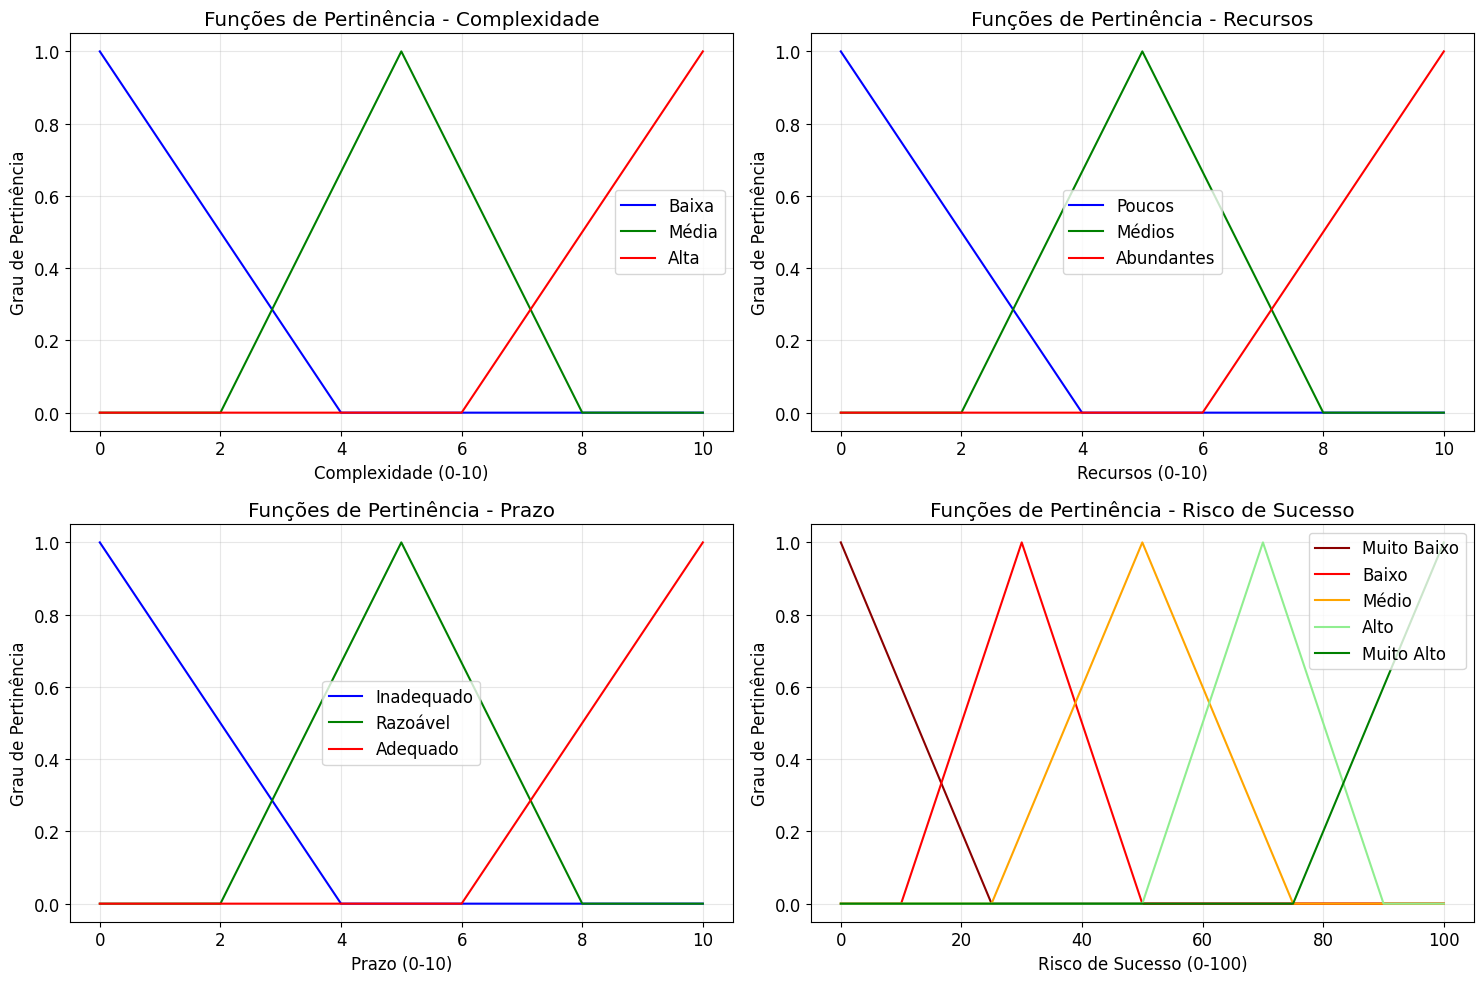

Os gráficos mostram:
1. Como cada valor numérico se mapeia para graus de pertinência (0-1)
2. A sobreposição entre conjuntos fuzzy adjacentes
3. As funções triangulares que definem os termos linguísticos
4. A cobertura completa do universo de discurso de cada variável


In [ ]:
# Visualizamos as funções de pertinência
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Complexidade
axes[0,0].plot(complexidade.universe, complexidade['baixa'].mf, 'b', linewidth=1.5, label='Baixa')
axes[0,0].plot(complexidade.universe, complexidade['media'].mf, 'g', linewidth=1.5, label='Média')
axes[0,0].plot(complexidade.universe, complexidade['alta'].mf, 'r', linewidth=1.5, label='Alta')
axes[0,0].set_title('Funções de Pertinência - Complexidade')
axes[0,0].set_xlabel('Complexidade (0-10)')
axes[0,0].set_ylabel('Grau de Pertinência')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Recursos
axes[0,1].plot(recursos.universe, recursos['poucos'].mf, 'b', linewidth=1.5, label='Poucos')
axes[0,1].plot(recursos.universe, recursos['medios'].mf, 'g', linewidth=1.5, label='Médios')
axes[0,1].plot(recursos.universe, recursos['abundantes'].mf, 'r', linewidth=1.5, label='Abundantes')
axes[0,1].set_title('Funções de Pertinência - Recursos')
axes[0,1].set_xlabel('Recursos (0-10)')
axes[0,1].set_ylabel('Grau de Pertinência')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Prazo
axes[1,0].plot(prazo.universe, prazo['inadequado'].mf, 'b', linewidth=1.5, label='Inadequado')
axes[1,0].plot(prazo.universe, prazo['razoavel'].mf, 'g', linewidth=1.5, label='Razoável')
axes[1,0].plot(prazo.universe, prazo['adequado'].mf, 'r', linewidth=1.5, label='Adequado')
axes[1,0].set_title('Funções de Pertinência - Prazo')
axes[1,0].set_xlabel('Prazo (0-10)')
axes[1,0].set_ylabel('Grau de Pertinência')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Risco de Sucesso
axes[1,1].plot(risco_sucesso.universe, risco_sucesso['muito_baixo'].mf, 'darkred', linewidth=1.5, label='Muito Baixo')
axes[1,1].plot(risco_sucesso.universe, risco_sucesso['baixo'].mf, 'red', linewidth=1.5, label='Baixo')
axes[1,1].plot(risco_sucesso.universe, risco_sucesso['medio'].mf, 'orange', linewidth=1.5, label='Médio')
axes[1,1].plot(risco_sucesso.universe, risco_sucesso['alto'].mf, 'lightgreen', linewidth=1.5, label='Alto')
axes[1,1].plot(risco_sucesso.universe, risco_sucesso['muito_alto'].mf, 'green', linewidth=1.5, label='Muito Alto')
axes[1,1].set_title('Funções de Pertinência - Risco de Sucesso')
axes[1,1].set_xlabel('Risco de Sucesso (0-100)')
axes[1,1].set_ylabel('Grau de Pertinência')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Os gráficos mostram:")
print("1. Como cada valor numérico se mapeia para graus de pertinência (0-1)")
print("2. A sobreposição entre conjuntos fuzzy adjacentes")
print("3. As funções triangulares que definem os termos linguísticos")
print("4. A cobertura completa do universo de discurso de cada variável")

### 2.3 Definir Regras Fuzzy para Análise de Risco

As regras fuzzy capturam o conhecimento de como a complexidade, recursos e prazo influenciam o risco de sucesso do projeto.

In [ ]:
# Definimos algumas regras fuzzy para análise de risco
regras_risco = [
    # Regras de alto risco (sucesso muito baixo/baixo)
    ctrl.Rule(complexidade['alta'] & recursos['poucos'] & prazo['inadequado'], risco_sucesso['muito_baixo']),
    ctrl.Rule(complexidade['alta'] & recursos['poucos'] & prazo['razoavel'], risco_sucesso['muito_baixo']),
    ctrl.Rule(complexidade['alta'] & recursos['medios'] & prazo['inadequado'], risco_sucesso['baixo']),
    ctrl.Rule(complexidade['media'] & recursos['poucos'] & prazo['inadequado'], risco_sucesso['baixo']),
    
    # Regras de risco médio
    ctrl.Rule(complexidade['baixa'] & recursos['poucos'] & prazo['razoavel'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['media'] & recursos['medios'] & prazo['razoavel'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['alta'] & recursos['abundantes'] & prazo['inadequado'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['baixa'] & recursos['poucos'] & prazo['adequado'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['baixa'] & recursos['medios'] & prazo['inadequado'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['media'] & recursos['poucos'] & prazo['adequado'], risco_sucesso['medio']),
    
    # Regras de baixo risco (sucesso alto/muito alto)
    ctrl.Rule(complexidade['baixa'] & recursos['medios'] & prazo['adequado'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['media'] & recursos['abundantes'] & prazo['adequado'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['baixa'] & recursos['abundantes'] & prazo['razoavel'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['baixa'] & recursos['abundantes'] & prazo['adequado'], risco_sucesso['muito_alto']),
    ctrl.Rule(complexidade['media'] & recursos['abundantes'] & prazo['adequado'], risco_sucesso['muito_alto']),
    ctrl.Rule(complexidade['baixa'] & recursos['medios'] & prazo['razoavel'], risco_sucesso['alto']),
    
    # Regras adicionais para cobertura completa
    ctrl.Rule(complexidade['alta'] & recursos['abundantes'] & prazo['adequado'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['alta'] & recursos['poucos'] & prazo['adequado'], risco_sucesso['baixo']),
    ctrl.Rule(complexidade['alta'] & recursos['medios'] & prazo['razoavel'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['alta'] & recursos['medios'] & prazo['adequado'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['alta'] & recursos['abundantes'] & prazo['razoavel'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['media'] & recursos['medios'] & prazo['inadequado'], risco_sucesso['baixo']),
    ctrl.Rule(complexidade['media'] & recursos['abundantes'] & prazo['inadequado'], risco_sucesso['medio']),
    ctrl.Rule(complexidade['media'] & recursos['abundantes'] & prazo['razoavel'], risco_sucesso['alto']),
    ctrl.Rule(complexidade['baixa'] & recursos['poucos'] & prazo['inadequado'], risco_sucesso['baixo']),
    ctrl.Rule(complexidade['baixa'] & recursos['abundantes'] & prazo['inadequado'], risco_sucesso['medio']),
]

print(f"Base de regras criada com {len(regras_risco)} regras fuzzy")

Base de regras criada com 26 regras fuzzy

Exemplos de regras:
- SE complexidade=alta E recursos=poucos E prazo=inadequado ENTÃO risco_sucesso=muito_baixo
- SE complexidade=baixa E recursos=abundantes E prazo=adequado ENTÃO risco_sucesso=muito_alto
- SE complexidade=media E recursos=medios E prazo=razoavel ENTÃO risco_sucesso=medio
- SE complexidade=baixa E recursos=medios E prazo=inadequado ENTÃO risco_sucesso=medio


### 2.4 Implementar Sistema de Inferência para Análise de Risco

In [ ]:
# Criamos o sistema de controle fuzzy para análise de risco
sistema_risco = ctrl.ControlSystem(regras_risco)
simulacao_risco = ctrl.ControlSystemSimulation(sistema_risco)

print("🙏 Sistema de inferência criado!")
print(f"Número total de regras: {len(regras_risco)}")

# Usar as variáveis já definidas para extrair informações
print(f"\nVariáveis de ENTRADA (Antecedentes):")
print(f"  complexidade: {list(complexidade.terms.keys())}")
print(f"    Universo: [{complexidade.universe.min()}, {complexidade.universe.max()}]")
print(f"  recursos: {list(recursos.terms.keys())}")
print(f"    Universo: [{recursos.universe.min()}, {recursos.universe.max()}]")
print(f"  prazo: {list(prazo.terms.keys())}")
print(f"    Universo: [{prazo.universe.min()}, {prazo.universe.max()}]")

print(f"\nVariáveis de SAÍDA (Consequentes):")
print(f"  risco_sucesso: {list(risco_sucesso.terms.keys())}")
print(f"    Universo: [{risco_sucesso.universe.min()}, {risco_sucesso.universe.max()}]")

try:
    # Teste rápido para verificar se o sistema tá funcionando
    simulacao_risco.input['complexidade'] = 5
    simulacao_risco.input['recursos'] = 5  
    simulacao_risco.input['prazo'] = 5
    simulacao_risco.compute()
    print(f"- Teste (5,5,5): Risco = {simulacao_risco.output['risco_sucesso']:.1f}%")
except Exception as e:
    print(f"- Status: Erro no sistema - {e}")

=== SISTEMA DE INFERÊNCIA CRIADO ===
Número total de regras: 26

Variáveis de ENTRADA (Antecedentes):
  complexidade: ['baixa', 'media', 'alta']
    Universo: [0, 10]
  recursos: ['poucos', 'medios', 'abundantes']
    Universo: [0, 10]
  prazo: ['inadequado', 'razoavel', 'adequado']
    Universo: [0, 10]

Variáveis de SAÍDA (Consequentes):
  risco_sucesso: ['muito_baixo', 'baixo', 'medio', 'alto', 'muito_alto']
    Universo: [0, 100]

Informações do sistema:
- Tipo do sistema: ControlSystem
- Tipo da simulação: ControlSystemSimulation
- Motor de inferência: Mamdani (padrão do scikit-fuzzy)
- Operador AND: min (padrão)
- Operador OR: max (padrão)
- Método de defuzzificação: centroid (padrão)
- Status: Sistema funcionando corretamente ✓
- Teste (5,5,5): Risco = 50.0%


### 2.5 Executar Simulações para Análise de Risco

In [ ]:
# Testamos o sistema com diferentes cenários
cenarios = [
    {"nome": "Projeto Simples com Muitos Recursos", "complexidade": 2, "recursos": 9, "prazo": 8},
    {"nome": "Projeto Complexo com Poucos Recursos", "complexidade": 9, "recursos": 2, "prazo": 3},
    {"nome": "Projeto Médio com Recursos Médios", "complexidade": 5, "recursos": 5, "prazo": 5},
    {"nome": "Projeto Complexo com Recursos Adequados", "complexidade": 8, "recursos": 7, "prazo": 6},
    {"nome": "Projeto Simples com Prazo Inadequado", "complexidade": 3, "recursos": 6, "prazo": 2},
]

print("=== ANÁLISE DE RISCO DE PROJETOS DE SOFTWARE ===\n")

resultados_risco = []
for cenario in cenarios:
    # Definimos as entradas
    simulacao_risco.input['complexidade'] = cenario['complexidade']
    simulacao_risco.input['recursos'] = cenario['recursos']
    simulacao_risco.input['prazo'] = cenario['prazo']
    
    # Computamos o resultado
    simulacao_risco.compute()
    resultado = simulacao_risco.output['risco_sucesso']
    
    resultados_risco.append(resultado)
    
    print(f"Cenário: {cenario['nome']}")
    print(f"  Entradas: Complexidade={cenario['complexidade']}, Recursos={cenario['recursos']}, Prazo={cenario['prazo']}")
    print(f"  Risco de Sucesso: {resultado:.1f}/100")
    
    # Interpretação do resultado
    if resultado < 25:
        interpretacao = "Risco MUITO ALTO - Projeto com alta probabilidade de falha"
    elif resultado < 40:
        interpretacao = "Risco ALTO - Projeto necessita atenção especial"
    elif resultado < 60:
        interpretacao = "Risco MÉDIO - Projeto viável com cuidados"
    elif resultado < 80:
        interpretacao = "Risco BAIXO - Projeto promissor"
    else:
        interpretacao = "Risco MUITO BAIXO - Projeto com alta probabilidade de sucesso"
    
    print(f"  Interpretação: {interpretacao}\n")

print(f"Resumo: Testados {len(cenarios)} cenários diferentes")

=== ANÁLISE DE RISCO DE PROJETOS DE SOFTWARE ===

Cenário: Projeto Simples com Muitos Recursos
  Entradas: Complexidade=2, Recursos=9, Prazo=8
  Risco de Sucesso: 90.3/100
  Interpretação: Risco MUITO BAIXO - Projeto com alta probabilidade de sucesso

Cenário: Projeto Complexo com Poucos Recursos
  Entradas: Complexidade=9, Recursos=2, Prazo=3
  Risco de Sucesso: 10.6/100
  Interpretação: Risco MUITO ALTO - Projeto com alta probabilidade de falha

Cenário: Projeto Médio com Recursos Médios
  Entradas: Complexidade=5, Recursos=5, Prazo=5
  Risco de Sucesso: 50.0/100
  Interpretação: Risco MÉDIO - Projeto viável com cuidados

Cenário: Projeto Complexo com Recursos Adequados
  Entradas: Complexidade=8, Recursos=7, Prazo=6
  Risco de Sucesso: 56.5/100
  Interpretação: Risco MÉDIO - Projeto viável com cuidados

Cenário: Projeto Simples com Prazo Inadequado
  Entradas: Complexidade=3, Recursos=6, Prazo=2
  Risco de Sucesso: 40.5/100
  Interpretação: Risco MÉDIO - Projeto viável com cuidados


## 3. Sistema 2: Controle de Temperatura do Chuveiro

### Descrição do Problema:
Este sistema controla a temperatura da água de um chuveiro baseado em duas variáveis principais:
- **Temperatura Atual**: Temperatura atual da água em graus Celsius (0-50°C)
- **Temperatura Desejada**: Temperatura desejada pelo usuário em graus Celsius (20-45°C)

**Objetivo**: Determinar o **Ajuste da Válvula** para controlar o fluxo de água quente e fria (-10 a +10, onde valores negativos aumentam água fria e positivos aumentam água quente).

### 3.1 Definir Variáveis de Entrada e Saída para Controle de Temperatura

In [ ]:
# Primeiramente, definimos as variáveis para controle de temperatura
# Variáveis de entrada (antecedentes)
temp_atual = ctrl.Antecedent(np.arange(0, 51, 1), 'temp_atual')
temp_desejada = ctrl.Antecedent(np.arange(20, 46, 1), 'temp_desejada')

# Variável de saída (consequente)
ajuste_valvula = ctrl.Consequent(np.arange(-10, 11, 1), 'ajuste_valvula')

print("Variáveis definidas:")
print("- Temperatura Atual: 0-50°C")
print("- Temperatura Desejada: 20-45°C")
print("- Ajuste da Válvula: -10 a +10 (-10=mais fria, +10=mais quente)")

Variáveis definidas:
- Temperatura Atual: 0-50°C
- Temperatura Desejada: 20-45°C
- Ajuste da Válvula: -10 a +10 (-10=mais fria, +10=mais quente)


### 3.2 Criar Funções de Pertinência para Controle de Temperatura

In [41]:
# Funções de pertinência para TEMPERATURA ATUAL
temp_atual['fria'] = fuzz.trimf(temp_atual.universe, [0, 0, 20])
temp_atual['morna'] = fuzz.trimf(temp_atual.universe, [15, 25, 35])
temp_atual['quente'] = fuzz.trimf(temp_atual.universe, [30, 50, 50])

# Funções de pertinência para TEMPERATURA DESEJADA
temp_desejada['baixa'] = fuzz.trimf(temp_desejada.universe, [20, 20, 30])
temp_desejada['media'] = fuzz.trimf(temp_desejada.universe, [25, 32, 38])
temp_desejada['alta'] = fuzz.trimf(temp_desejada.universe, [35, 45, 45])

# Funções de pertinência para AJUSTE DA VÁLVULA
ajuste_valvula['muito_mais_fria'] = fuzz.trimf(ajuste_valvula.universe, [-10, -10, -6])
ajuste_valvula['mais_fria'] = fuzz.trimf(ajuste_valvula.universe, [-8, -4, 0])
ajuste_valvula['manter'] = fuzz.trimf(ajuste_valvula.universe, [-2, 0, 2])
ajuste_valvula['mais_quente'] = fuzz.trimf(ajuste_valvula.universe, [0, 4, 8])
ajuste_valvula['muito_mais_quente'] = fuzz.trimf(ajuste_valvula.universe, [6, 10, 10])

print("Funções de pertinência criadas!")
print("- Temperatura Atual: fria, morna, quente")
print("- Temperatura Desejada: baixa, média, alta")
print("- Ajuste Válvula: muito_mais_fria, mais_fria, manter, mais_quente, muito_mais_quente")

Funções de pertinência criadas!
- Temperatura Atual: fria, morna, quente
- Temperatura Desejada: baixa, média, alta
- Ajuste Válvula: muito_mais_fria, mais_fria, manter, mais_quente, muito_mais_quente


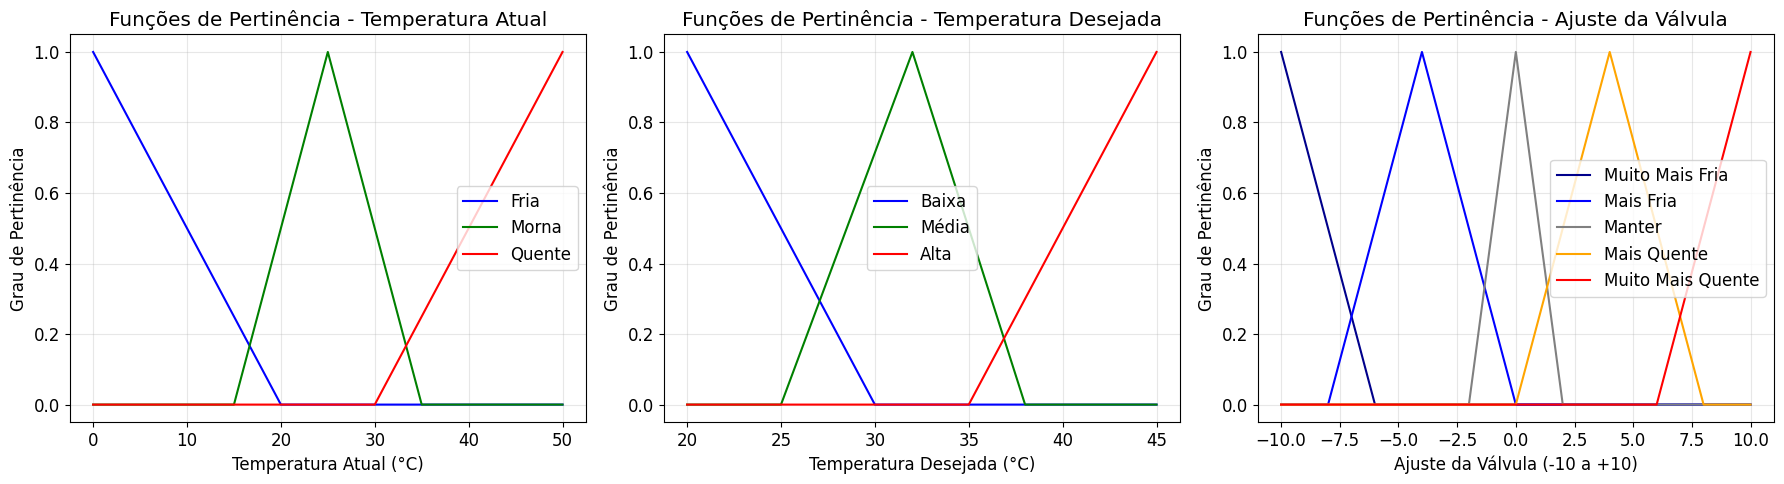

In [ ]:
# Visualizamos as funções de pertinência do sistema de temperatura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperatura Atual
axes[0].plot(temp_atual.universe, temp_atual['fria'].mf, 'b', linewidth=1.5, label='Fria')
axes[0].plot(temp_atual.universe, temp_atual['morna'].mf, 'g', linewidth=1.5, label='Morna')
axes[0].plot(temp_atual.universe, temp_atual['quente'].mf, 'r', linewidth=1.5, label='Quente')
axes[0].set_title('Funções de Pertinência - Temperatura Atual')
axes[0].set_xlabel('Temperatura Atual (°C)')
axes[0].set_ylabel('Grau de Pertinência')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Temperatura Desejada
axes[1].plot(temp_desejada.universe, temp_desejada['baixa'].mf, 'b', linewidth=1.5, label='Baixa')
axes[1].plot(temp_desejada.universe, temp_desejada['media'].mf, 'g', linewidth=1.5, label='Média')
axes[1].plot(temp_desejada.universe, temp_desejada['alta'].mf, 'r', linewidth=1.5, label='Alta')
axes[1].set_title('Funções de Pertinência - Temperatura Desejada')
axes[1].set_xlabel('Temperatura Desejada (°C)')
axes[1].set_ylabel('Grau de Pertinência')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Ajuste da Válvula
axes[2].plot(ajuste_valvula.universe, ajuste_valvula['muito_mais_fria'].mf, 'darkblue', linewidth=1.5, label='Muito Mais Fria')
axes[2].plot(ajuste_valvula.universe, ajuste_valvula['mais_fria'].mf, 'blue', linewidth=1.5, label='Mais Fria')
axes[2].plot(ajuste_valvula.universe, ajuste_valvula['manter'].mf, 'gray', linewidth=1.5, label='Manter')
axes[2].plot(ajuste_valvula.universe, ajuste_valvula['mais_quente'].mf, 'orange', linewidth=1.5, label='Mais Quente')
axes[2].plot(ajuste_valvula.universe, ajuste_valvula['muito_mais_quente'].mf, 'red', linewidth=1.5, label='Muito Mais Quente')
axes[2].set_title('Funções de Pertinência - Ajuste da Válvula')
axes[2].set_xlabel('Ajuste da Válvula (-10 a +10)')
axes[2].set_ylabel('Grau de Pertinência')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Definir Regras Fuzzy para Controle de Temperatura

In [ ]:
# Definimos as regras fuzzy para controle de temperatura
# Lógica: Comparar temperatura atual com temperatura desejada
regras_temperatura = [
    # Se temperatura atual é fria
    ctrl.Rule(temp_atual['fria'] & temp_desejada['baixa'], ajuste_valvula['mais_quente']),
    ctrl.Rule(temp_atual['fria'] & temp_desejada['media'], ajuste_valvula['muito_mais_quente']),
    ctrl.Rule(temp_atual['fria'] & temp_desejada['alta'], ajuste_valvula['muito_mais_quente']),
    
    # Se temperatura atual é morna
    ctrl.Rule(temp_atual['morna'] & temp_desejada['baixa'], ajuste_valvula['mais_fria']),
    ctrl.Rule(temp_atual['morna'] & temp_desejada['media'], ajuste_valvula['manter']),
    ctrl.Rule(temp_atual['morna'] & temp_desejada['alta'], ajuste_valvula['mais_quente']),
    
    # Se temperatura atual é quente
    ctrl.Rule(temp_atual['quente'] & temp_desejada['baixa'], ajuste_valvula['muito_mais_fria']),
    ctrl.Rule(temp_atual['quente'] & temp_desejada['media'], ajuste_valvula['mais_fria']),
    ctrl.Rule(temp_atual['quente'] & temp_desejada['alta'], ajuste_valvula['manter']),
]

print(f"Base de regras criada com {len(regras_temperatura)} regras fuzzy")
print("\nExemplos de regras:")
print("- SE temp_atual=fria E temp_desejada=alta ENTÃO ajuste=muito_mais_quente")
print("- SE temp_atual=morna E temp_desejada=media ENTÃO ajuste=manter")
print("- SE temp_atual=quente E temp_desejada=baixa ENTÃO ajuste=muito_mais_fria")

Base de regras criada com 9 regras fuzzy

Exemplos de regras:
- SE temp_atual=fria E temp_desejada=alta ENTÃO ajuste=muito_mais_quente
- SE temp_atual=morna E temp_desejada=media ENTÃO ajuste=manter
- SE temp_atual=quente E temp_desejada=baixa ENTÃO ajuste=muito_mais_fria


### 3.4 Implementar Sistema de Inferência para Controle de Temperatura

In [ ]:
# Criamos o sistema de controle fuzzy para o controle de temperatura
sistema_temperatura = ctrl.ControlSystem(regras_temperatura)
simulacao_temperatura = ctrl.ControlSystemSimulation(sistema_temperatura)

print("=== SISTEMA DE CONTROLE DE TEMPERATURA CRIADO ===")
print(f"Número total de regras: {len(regras_temperatura)}")

print(f"\nVariáveis de ENTRADA (Antecedentes):")
print(f"  temp_atual: {list(temp_atual.terms.keys())}")
print(f"    Universo: [{temp_atual.universe.min()}, {temp_atual.universe.max()}]°C")
print(f"  temp_desejada: {list(temp_desejada.terms.keys())}")
print(f"    Universo: [{temp_desejada.universe.min()}, {temp_desejada.universe.max()}]°C")

print(f"\nVariáveis de SAÍDA (Consequentes):")
print(f"  ajuste_valvula: {list(ajuste_valvula.terms.keys())}")
print(f"    Universo: [{ajuste_valvula.universe.min()}, {ajuste_valvula.universe.max()}]")

print(f"\nInformações do sistema:")
print(f"- Tipo do sistema: {type(sistema_temperatura).__name__}")
print(f"- Tipo da simulação: {type(simulacao_temperatura).__name__}")
print(f"- Motor de inferência: Mamdani (padrão do scikit-fuzzy)")
print(f"- Operador AND: min (padrão)")
print(f"- Operador OR: max (padrão)")
print(f"- Método de defuzzificação: centroid (padrão)")

# Verificamos se o sistema está pronto para uso
try:
    # Teste rápido para verificar se o sistema tá funcionando
    simulacao_temperatura.input['temp_atual'] = 25
    simulacao_temperatura.input['temp_desejada'] = 32
    simulacao_temperatura.compute()
    print(f"- Teste (25°C→32°C): Ajuste = {simulacao_temperatura.output['ajuste_valvula']:.1f}")
except Exception as e:
    print(f"- Status: Erro no sistema - {e}")

=== SISTEMA DE CONTROLE DE TEMPERATURA CRIADO ===
Número total de regras: 9

Variáveis de ENTRADA (Antecedentes):
  temp_atual: ['fria', 'morna', 'quente']
    Universo: [0, 50]°C
  temp_desejada: ['baixa', 'media', 'alta']
    Universo: [20, 45]°C

Variáveis de SAÍDA (Consequentes):
  ajuste_valvula: ['muito_mais_fria', 'mais_fria', 'manter', 'mais_quente', 'muito_mais_quente']
    Universo: [-10, 10]

Informações do sistema:
- Tipo do sistema: ControlSystem
- Tipo da simulação: ControlSystemSimulation
- Motor de inferência: Mamdani (padrão do scikit-fuzzy)
- Operador AND: min (padrão)
- Operador OR: max (padrão)
- Método de defuzzificação: centroid (padrão)
- Status: Sistema funcionando corretamente ✓
- Teste (25°C→32°C): Ajuste = -0.0


### 3.5 Executar Simulações para Controle de Temperatura

In [ ]:
# Testamos o sistema de controle de temperatura
cenarios_temp = [
    {"nome": "Água Muito Fria, Banho Morno", "temp_atual": 15, "temp_desejada": 32},
    {"nome": "Água Quente, Banho Frio", "temp_atual": 42, "temp_desejada": 25},
    {"nome": "Água Morna, Banho Morno", "temp_atual": 30, "temp_desejada": 32},
    {"nome": "Água Fria, Banho Quente", "temp_atual": 18, "temp_desejada": 40},
    {"nome": "Água Muito Quente, Banho Morno", "temp_atual": 47, "temp_desejada": 33},
]

print("=== CONTROLE DE TEMPERATURA DO CHUVEIRO ===\n")

resultados_temperatura = []
for cenario in cenarios_temp:
    # Definimos as entradas
    simulacao_temperatura.input['temp_atual'] = cenario['temp_atual']
    simulacao_temperatura.input['temp_desejada'] = cenario['temp_desejada']
    
    # E computamos o resultado
    simulacao_temperatura.compute()
    resultado = simulacao_temperatura.output['ajuste_valvula']
    
    resultados_temperatura.append(resultado)
    
    print(f"Cenário: {cenario['nome']}")
    print(f"  Entradas: Temp. Atual={cenario['temp_atual']}°C, Temp. Desejada={cenario['temp_desejada']}°C")
    print(f"  Ajuste da Válvula: {resultado:.1f}")
    
    # Interpretação do resultado
    if resultado < -6:
        interpretacao = "MUITO MAIS FRIA - Aumentar significativamente a água fria"
    elif resultado < -2:
        interpretacao = "MAIS FRIA - Aumentar água fria"
    elif resultado < 2:
        interpretacao = "MANTER - Temperatura adequada"
    elif resultado < 6:
        interpretacao = "MAIS QUENTE - Aumentar água quente"
    else:
        interpretacao = "MUITO MAIS QUENTE - Aumentar significativamente a água quente"
    
    print(f"  Ação: {interpretacao}\n")

print(f"Resumo: Testados {len(cenarios_temp)} cenários diferentes")

=== CONTROLE DE TEMPERATURA DO CHUVEIRO ===

Cenário: Água Muito Fria, Banho Morno
  Entradas: Temp. Atual=15°C, Temp. Desejada=32°C
  Ajuste da Válvula: 8.2
  Ação: MUITO MAIS QUENTE - Aumentar significativamente a água quente

Cenário: Água Quente, Banho Frio
  Entradas: Temp. Atual=42°C, Temp. Desejada=25°C
  Ajuste da Válvula: -8.4
  Ação: MUITO MAIS FRIA - Aumentar significativamente a água fria

Cenário: Água Morna, Banho Morno
  Entradas: Temp. Atual=30°C, Temp. Desejada=32°C
  Ajuste da Válvula: -0.0
  Ação: MANTER - Temperatura adequada

Cenário: Água Fria, Banho Quente
  Entradas: Temp. Atual=18°C, Temp. Desejada=40°C
  Ajuste da Válvula: 4.5
  Ação: MAIS QUENTE - Aumentar água quente

Cenário: Água Muito Quente, Banho Morno
  Entradas: Temp. Atual=47°C, Temp. Desejada=33°C
  Ajuste da Válvula: -4.0
  Ação: MAIS FRIA - Aumentar água fria

Resumo: Testados 5 cenários diferentes


## 4. Análise e Visualização de Resultados

### 4.1 Superfícies de Controle e Análise Comparativa

Aviso: Usando valor heurístico 10.0 para complexidade=4, recursos=0
Aviso: Usando valor heurístico 20.0 para complexidade=4, recursos=1
Aviso: Usando valor heurístico 30.0 para complexidade=4, recursos=2
Aviso: Usando valor heurístico 0.0 para complexidade=5, recursos=0
Aviso: Usando valor heurístico 10.0 para complexidade=5, recursos=1
Aviso: Usando valor heurístico 20.0 para complexidade=5, recursos=2
Aviso: Usando valor heurístico 0.0 para complexidade=6, recursos=0
Aviso: Usando valor heurístico 0.0 para complexidade=6, recursos=1
Aviso: Usando valor heurístico 10.0 para complexidade=6, recursos=2
Aviso: Usando valor heurístico 0.0 para complexidade=6, recursos=0
Aviso: Usando valor heurístico 0.0 para complexidade=6, recursos=1
Aviso: Usando valor heurístico 10.0 para complexidade=6, recursos=2


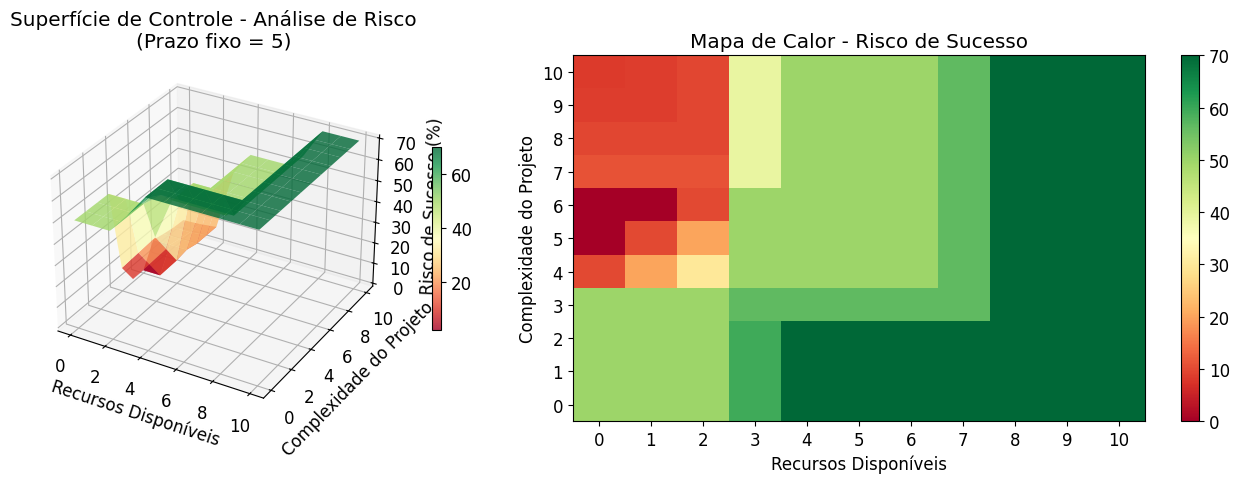

Interpretação da Superfície de Controle:
- Cores verdes: Baixo risco (alta probabilidade de sucesso)
- Cores amarelas: Risco médio
- Cores vermelhas: Alto risco (baixa probabilidade de sucesso)
- Observe como baixos recursos + alta complexidade = alto risco
- Nota: Alguns valores podem usar heurística quando as regras fuzzy não cobrem todas as combinações


In [ ]:
# Por fim, nós podemos gerar uma superfície de controle 3D para análise de risco
# Para isso, criamos um grid de valores para análise
complexidade_range = np.arange(0, 11, 1)
recursos_range = np.arange(0, 11, 1)
prazo_fixo = 5  # Fixar prazo em 5 para análise 2D

# Calculamos as saídas para diferentes combinações
superficie_risco = np.zeros((len(complexidade_range), len(recursos_range)))

for i, comp in enumerate(complexidade_range):
    for j, rec in enumerate(recursos_range):
        try:
            simulacao_risco.input['complexidade'] = comp
            simulacao_risco.input['recursos'] = rec
            simulacao_risco.input['prazo'] = prazo_fixo
            simulacao_risco.compute()
            
            # Verificar se a saída existe
            if 'risco_sucesso' in simulacao_risco.output:
                superficie_risco[i, j] = simulacao_risco.output['risco_sucesso']
            else:
                # Se não houver saída, usamos um valor padrão baseado nas entradas
                # Heurística simples: mais recursos = menor risco, mais complexidade = maior risco
                valor_heuristico = max(0, min(100, 50 + (rec - comp) * 10))
                superficie_risco[i, j] = valor_heuristico
                print(f"Aviso: Usando valor heurístico {valor_heuristico:.1f} para complexidade={comp}, recursos={rec}")
                
        except Exception as e:
            # Em caso de erro, usamos heurística simples
            valor_heuristico = max(0, min(100, 50 + (rec - comp) * 10))
            superficie_risco[i, j] = valor_heuristico
            print(f"Erro para complexidade={comp}, recursos={rec}: {str(e)}")
            print(f"Usando valor heurístico: {valor_heuristico:.1f}")

# Plotamos a superfície de controle
fig = plt.figure(figsize=(15, 5))

# Gráfico 1: Superfície 3D para análise de risco
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(recursos_range, complexidade_range)
surf1 = ax1.plot_surface(X, Y, superficie_risco, cmap='RdYlGn', alpha=0.8)
ax1.set_xlabel('Recursos Disponíveis')
ax1.set_ylabel('Complexidade do Projeto')
ax1.set_zlabel('Risco de Sucesso (%)')
ax1.set_title(f'Superfície de Controle - Análise de Risco\n(Prazo fixo = {prazo_fixo})')
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=20)

# Gráfico 2: Mapa de calor
ax2 = fig.add_subplot(122)
im = ax2.imshow(superficie_risco, cmap='RdYlGn', aspect='auto', origin='lower')
ax2.set_xlabel('Recursos Disponíveis')
ax2.set_ylabel('Complexidade do Projeto')
ax2.set_title('Mapa de Calor - Risco de Sucesso')
ax2.set_xticks(range(len(recursos_range)))
ax2.set_yticks(range(len(complexidade_range)))
ax2.set_xticklabels(recursos_range)
ax2.set_yticklabels(complexidade_range)
fig.colorbar(im, ax=ax2)

plt.tight_layout()
plt.show()

print("Interpretação da Superfície de Controle:")
print("- Cores verdes: Baixo risco (alta probabilidade de sucesso)")
print("- Cores amarelas: Risco médio")
print("- Cores vermelhas: Alto risco (baixa probabilidade de sucesso)")
print("- Observe como baixos recursos + alta complexidade = alto risco")
print("- Nota: Alguns valores podem usar heurística quando as regras fuzzy não cobrem todas as combinações")

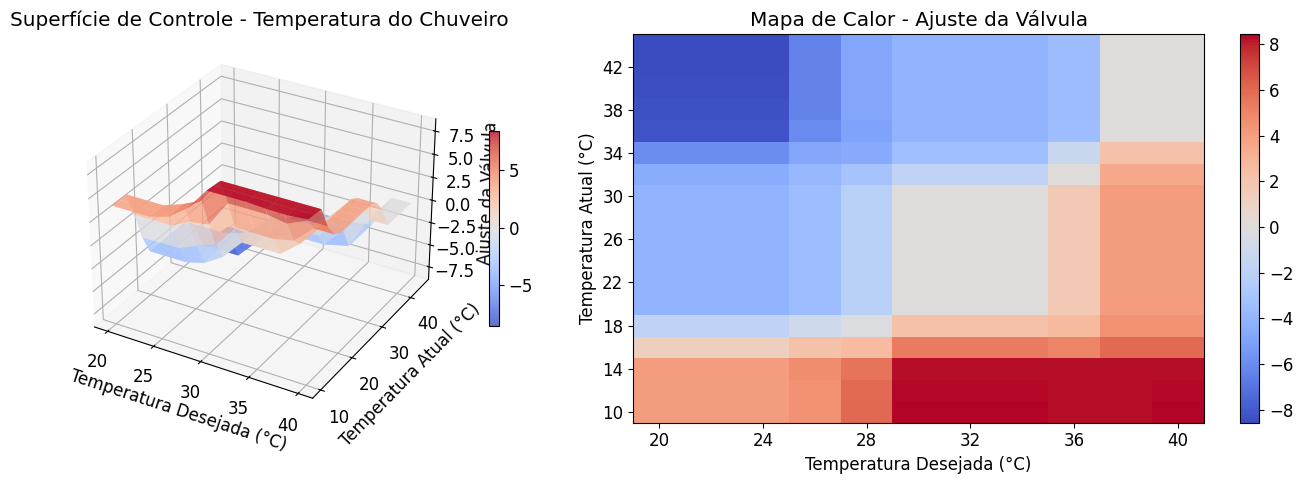

Interpretação da Superfície de Controle:
- Cores azuis: Reduzir temperatura (mais água fria)
- Cores brancas: Manter temperatura
- Cores vermelhas: Aumentar temperatura (mais água quente)
- A diagonal principal mostra o comportamento ideal (temp_atual ≈ temp_desejada)


In [ ]:
# Fazemos o mesmo para o sistema de controle de temperatura
# Primeiramente, geramos uma superfície de controle para sistema de temperatura
temp_atual_range = np.arange(10, 46, 2)  # Reduzimos a densidade para maior performance
temp_desejada_range = np.arange(20, 41, 2)

# Calculamos as saídas para diferentes combinações
superficie_temp = np.zeros((len(temp_atual_range), len(temp_desejada_range)))

for i, atual in enumerate(temp_atual_range):
    for j, desejada in enumerate(temp_desejada_range):
        simulacao_temperatura.input['temp_atual'] = atual
        simulacao_temperatura.input['temp_desejada'] = desejada
        simulacao_temperatura.compute()
        superficie_temp[i, j] = simulacao_temperatura.output['ajuste_valvula']

# Plotamos a superfície de controle para temperatura
fig = plt.figure(figsize=(15, 5))

# Gráfico 1: Superfície 3D para controle de temperatura
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(temp_desejada_range, temp_atual_range)
surf2 = ax1.plot_surface(X, Y, superficie_temp, cmap='coolwarm', alpha=0.8)
ax1.set_xlabel('Temperatura Desejada (°C)')
ax1.set_ylabel('Temperatura Atual (°C)')
ax1.set_zlabel('Ajuste da Válvula')
ax1.set_title('Superfície de Controle - Temperatura do Chuveiro')
fig.colorbar(surf2, ax=ax1, shrink=0.5, aspect=20)

# Gráfico 2: Mapa de calor
ax2 = fig.add_subplot(122)
im = ax2.imshow(superficie_temp, cmap='coolwarm', aspect='auto', origin='lower')
ax2.set_xlabel('Temperatura Desejada (°C)')
ax2.set_ylabel('Temperatura Atual (°C)')
ax2.set_title('Mapa de Calor - Ajuste da Válvula')
ax2.set_xticks(range(0, len(temp_desejada_range), 2))
ax2.set_yticks(range(0, len(temp_atual_range), 2))
ax2.set_xticklabels(temp_desejada_range[::2])
ax2.set_yticklabels(temp_atual_range[::2])
fig.colorbar(im, ax=ax2)

plt.tight_layout()
plt.show()

print("Interpretação da Superfície de Controle:")
print("- Cores azuis: Reduzir temperatura (mais água fria)")
print("- Cores brancas: Manter temperatura")
print("- Cores vermelhas: Aumentar temperatura (mais água quente)")
print("- A diagonal principal mostra o comportamento ideal (temp_atual ≈ temp_desejada)")

### 4.2 Análise do Processo de Inferência Fuzzy

In [ ]:
# Demonstramos o processo de inferência passo a passo
print("=== PROCESSO DE INFERÊNCIA FUZZY ===\n")

# Exemplo detalhado para análise de risco
print("1. ANÁLISE DE RISCO - Exemplo Detalhado:")
print("   Entradas: Complexidade=7, Recursos=3, Prazo=4")

# Definimos entradas específicas
simulacao_risco.input['complexidade'] = 7
simulacao_risco.input['recursos'] = 3
simulacao_risco.input['prazo'] = 4

# Calculamos os graus de pertinência para as entradas
comp_graus = {
    'baixa': fuzz.interp_membership(complexidade.universe, complexidade['baixa'].mf, 7),
    'media': fuzz.interp_membership(complexidade.universe, complexidade['media'].mf, 7),
    'alta': fuzz.interp_membership(complexidade.universe, complexidade['alta'].mf, 7)
}

rec_graus = {
    'poucos': fuzz.interp_membership(recursos.universe, recursos['poucos'].mf, 3),
    'medios': fuzz.interp_membership(recursos.universe, recursos['medios'].mf, 3),
    'abundantes': fuzz.interp_membership(recursos.universe, recursos['abundantes'].mf, 3)
}

pra_graus = {
    'inadequado': fuzz.interp_membership(prazo.universe, prazo['inadequado'].mf, 4),
    'razoavel': fuzz.interp_membership(prazo.universe, prazo['razoavel'].mf, 4),
    'adequado': fuzz.interp_membership(prazo.universe, prazo['adequado'].mf, 4)
}

print(f"\n2. FUZZIFICAÇÃO:")
print(f"   Complexidade=7 → Baixa:{comp_graus['baixa']:.2f}, Média:{comp_graus['media']:.2f}, Alta:{comp_graus['alta']:.2f}")
print(f"   Recursos=3     → Poucos:{rec_graus['poucos']:.2f}, Médios:{rec_graus['medios']:.2f}, Abundantes:{rec_graus['abundantes']:.2f}")
print(f"   Prazo=4        → Inadequado:{pra_graus['inadequado']:.2f}, Razoável:{pra_graus['razoavel']:.2f}, Adequado:{pra_graus['adequado']:.2f}")

print(f"\n3. AVALIAÇÃO DAS REGRAS (exemplos):")
# Exemplos de ativação de regras
regra1_ativacao = min(comp_graus['alta'], rec_graus['poucos'], pra_graus['inadequado'])
regra2_ativacao = min(comp_graus['media'], rec_graus['poucos'], pra_graus['razoavel'])
print(f"   Regra 1 (alta ∧ poucos ∧ inadequado → muito_baixo): {regra1_ativacao:.2f}")
print(f"   Regra 2 (média ∧ poucos ∧ razoável → baixo): {regra2_ativacao:.2f}")

# Executamos a inferência completa
simulacao_risco.compute()
resultado_final = simulacao_risco.output['risco_sucesso']

print(f"\n4. AGREGAÇÃO E DEFUZZIFICAÇÃO:")
print(f"   Método de defuzzificação: Centroide")
print(f"   Resultado final: {resultado_final:.1f}% de risco de sucesso")

# Exemplo para controle de temperatura
print(f"\n" + "="*50)
print("5. CONTROLE DE TEMPERATURA - Exemplo Detalhado:")
print("   Entradas: Temperatura Atual=25°C, Temperatura Desejada=35°C")

simulacao_temperatura.input['temp_atual'] = 25
simulacao_temperatura.input['temp_desejada'] = 35

# Calculamos os graus de pertinência
temp_atual_graus = {
    'fria': fuzz.interp_membership(temp_atual.universe, temp_atual['fria'].mf, 25),
    'morna': fuzz.interp_membership(temp_atual.universe, temp_atual['morna'].mf, 25),
    'quente': fuzz.interp_membership(temp_atual.universe, temp_atual['quente'].mf, 25)
}

temp_desejada_graus = {
    'baixa': fuzz.interp_membership(temp_desejada.universe, temp_desejada['baixa'].mf, 35),
    'media': fuzz.interp_membership(temp_desejada.universe, temp_desejada['media'].mf, 35),
    'alta': fuzz.interp_membership(temp_desejada.universe, temp_desejada['alta'].mf, 35)
}

print(f"\n6. FUZZIFICAÇÃO:")
print(f"   Temp. Atual=25°C  → Fria:{temp_atual_graus['fria']:.2f}, Morna:{temp_atual_graus['morna']:.2f}, Quente:{temp_atual_graus['quente']:.2f}")
print(f"   Temp. Desejada=35°C → Baixa:{temp_desejada_graus['baixa']:.2f}, Média:{temp_desejada_graus['media']:.2f}, Alta:{temp_desejada_graus['alta']:.2f}")

simulacao_temperatura.compute()
resultado_temp = simulacao_temperatura.output['ajuste_valvula']

print(f"\n7. RESULTADO FINAL:")
print(f"   Ajuste da válvula: {resultado_temp:.1f}")
print(f"   Interpretação: Aumentar água quente moderadamente")

=== PROCESSO DE INFERÊNCIA FUZZY ===

1. ANÁLISE DE RISCO - Exemplo Detalhado:
   Entradas: Complexidade=7, Recursos=3, Prazo=4

2. FUZZIFICAÇÃO:
   Complexidade=7 → Baixa:0.00, Média:0.33, Alta:0.25
   Recursos=3     → Poucos:0.25, Médios:0.33, Abundantes:0.00
   Prazo=4        → Inadequado:0.00, Razoável:0.67, Adequado:0.00

3. AVALIAÇÃO DAS REGRAS (exemplos):
   Regra 1 (alta ∧ poucos ∧ inadequado → muito_baixo): 0.00
   Regra 2 (média ∧ poucos ∧ razoável → baixo): 0.25

4. AGREGAÇÃO E DEFUZZIFICAÇÃO:
   Método de defuzzificação: Centroide
   Resultado final: 39.0% de risco de sucesso

5. CONTROLE DE TEMPERATURA - Exemplo Detalhado:
   Entradas: Temperatura Atual=25°C, Temperatura Desejada=35°C

6. FUZZIFICAÇÃO:
   Temp. Atual=25°C  → Fria:0.00, Morna:1.00, Quente:0.00
   Temp. Desejada=35°C → Baixa:0.00, Média:0.50, Alta:0.00

7. RESULTADO FINAL:
   Ajuste da válvula: -0.0
   Interpretação: Aumentar água quente moderadamente
